## Projeto 1
*Thiago Laidler Vidal Cunha*
DRE: 118030531

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import math
import scipy.stats as stats
from tqdm import tqdm 
import time
import multiprocessing as mp
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit
#import latexify
import random
import scipy.special as sp

**1)** Bruno está se preparando para uma observação e quer avaliar a qualidade dos dados que ele espera observar. Sabemos que a probabilidade de que um número N de fótons atinja o CCD durante uma integração de t segundos pode ser computado a partir de uma distribuição de Poisson. Para o primeiro alvo, sabemos que ele emite fótons a uma taxa de 2 fótons por segundo. Analise e Responda (incluir imagens):

    (a) Qual será a curva de distribuição de probabilidade para uma integração de 5 segundos? Adicione o print da curva.
    (b) Simule dados randômicos para esta distribuição (size = 10000) e compute qual o valor médio e o desvio padrão destes dados simulados?
    (c) Normalizando a curva para que o primeiro momento de variável aleatória se torne 1, qual o valor do desvio padrão desse conjunto após a normalização?
    (d) Se aumentarmos o tempo de integração para 7 segundos como o desvio padrão do conjunto após a normalização se comporta? Quão diferente ele se torna?
    (e) Qual o tempo de exposição necessários para que o desvio padrão após a normalização seja menor que 0.1?

A curva de distribuição de probabilidade para uma integração de 5 segundos será:

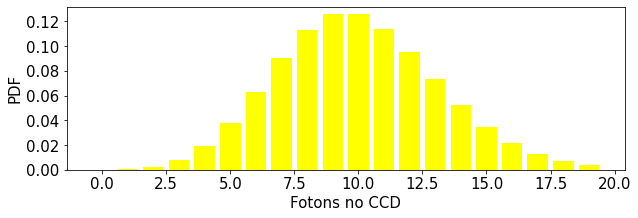

In [2]:
time = 5

mi = 2 * time

n = np.arange(0, mi*2.0, 1.0)

pdf = ((mi**n)/(sp.factorial(n)))*np.exp(-mi)

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(n, pdf/np.sum(pdf), color='yellow', width=0.8)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Fotons no CCD',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

• A função de probabilidade p de uma v. a. discreta $X$ é definida por $p(x) = p [X=x]$, para todo x real.

Uma variável aleatória (v.a.) é uma função que associa cada elemento de um espaço amostral a um número real. As variáveis aleatórias podem ser **discretas** se os seus valores pertencem a um conjunto enumerável de números reais (usualmente valores inteiros), ou **contínuas** se os seus valores pertencem a um intervalo de números reais. Nesse caso nossa variável aleatória será:

$X = $ N de fótons que atingem o CCD durante uma integração de t segundos

Para o caso de um fenômeno que se comporta segundo um processo de Poisson com parâmetro $\lambda$,
temos que o número $X$ de ocorrências ao longo de um intervalo de amplitude $t$ será uma variável aleatória discreta, tal que

$P[X = k] = \frac{e^{-\lambda t}(\lambda t)^{k}}{k!}$ para k numero inteiro,

*se e somente se* o intervalo de tempo T entre quaisquer duas ocorrências consecutivas desse
fenômeno for uma variável aleatória contínua que segue uma lei exponencial com parâmetro $\lambda$, isto é, $P[T<=t] = 1 - e^{-\lambda t}$, para todo t >O.

Por isso é possível notar que a v.a. $X$, embora discreta, pode assumir um número infinito de valores.

 - Seguindo o modelo de Poisson, mandamos a máquina criar valores aleatórios que sigam essa distribuição. É de se esperar que siga um formato parecido.

In [3]:
distribuicao_po = np.random.poisson(lam=mi, size=10000)

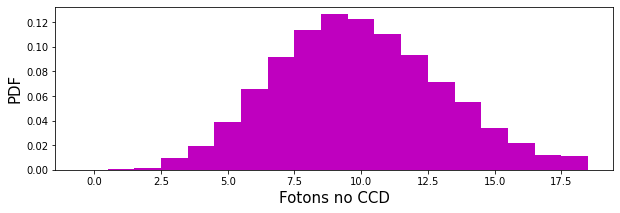

In [4]:
plt.figure(figsize=[10, 3], facecolor='white')
plt.hist(distribuicao_po, bins=n, density=True, align='left', color='m')
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Fotons no CCD',fontsize=15)
plt.show()

Abaixo teremos nossos valores de média (mean) e desvio padrão (std).

In [5]:
df_randpoisson = pd.Series(distribuicao_po)
df_randpoisson.describe()

count    10000.000000
mean         9.941100
std          3.159435
min          1.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         23.000000
dtype: float64

Aqui foi feito a normalização, ou seja, dividir pela média a fim de que se consiga centralizar a distribuição no valor 1.

In [6]:
df_randpoisson_Norm = pd.Series(distribuicao_po/(df_randpoisson.mean()))
df_randpoisson_Norm.describe()

count    10000.000000
mean         1.000000
std          0.317815
min          0.100592
25%          0.804740
50%          1.005925
75%          1.207110
max          2.313627
dtype: float64

In [7]:
u = df_randpoisson_Norm.mean()
o = df_randpoisson_Norm.std()

 - Como era de se esperar, o formato não se alterou.

Média : 0.99999999999998
Desvio Padrão: 0.3178154245210085


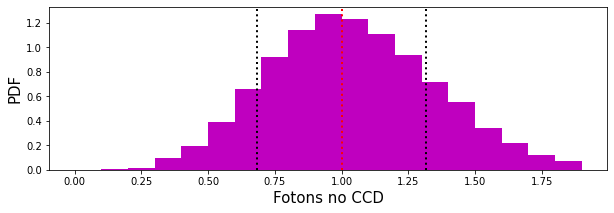

In [8]:
plt.figure(figsize=[10, 3], facecolor='white')
plt.hist(df_randpoisson_Norm, bins=n/10, density=True, color='m')
plt.axvline(+o+u, color='k', linestyle='dotted', linewidth=2)
plt.axvline(-o+u, color='k', linestyle='dotted', linewidth=2) 
plt.axvline(u, color='r', linestyle='dotted', linewidth=2) 
plt.ylabel('PDF', fontsize=15)
plt.xlabel('Fotons no CCD',  fontsize=15)
print('Média : '+str(u)+'\nDesvio Padrão: '+str(o))
plt.show()

Agora para t = 7 segundos, teremos $\lambda = 14$:

In [9]:
distribuicao_po = np.random.poisson(lam=14, size=10000) # 7segundos -> mi = 2*time => time = 7s; mi=14
df_randpoisson = pd.Series(distribuicao_po)
df_randpoisson.describe()

count    10000.00000
mean        13.99570
std          3.72095
min          3.00000
25%         11.00000
50%         14.00000
75%         16.00000
max         32.00000
dtype: float64

In [10]:
df_randpoisson_Norm = pd.Series(distribuicao_po/(df_randpoisson.mean()))
df_randpoisson_Norm.describe()

count    10000.000000
mean         1.000000
std          0.265864
min          0.214352
25%          0.785956
50%          1.000307
75%          1.143208
max          2.286417
dtype: float64

In [11]:
o = df_randpoisson_Norm.std()
u = df_randpoisson_Norm.mean()
n = np.arange(0, u*2.0, 0.1)

Média : 1.0000000000000102
Desvio Padrão: 0.2658637737008479


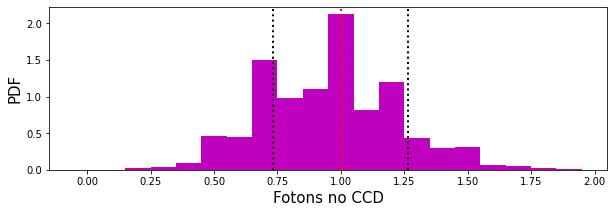

In [12]:
plt.figure(figsize=[10, 3], facecolor='white')
plt.hist(df_randpoisson_Norm, bins=n, density=True, align='left', color='m')
plt.axvline(+o+u, color='k', linestyle='dotted', linewidth=2)
plt.axvline(-o+u, color='k', linestyle='dotted', linewidth=2) 
plt.axvline(u, color='r', linestyle='dotted', linewidth=2) 
plt.ylabel('PDF', fontsize=15)
plt.xlabel('Fotons no CCD',  fontsize=15)
print('Média : '+str(u)+'\nDesvio Padrão: '+str(o))
plt.show()

Percebe-se uma queda do desvio padrão quando aumentamos o tempo de integração. Ou seja, podemos testar vários tempos de integração maiores a fim de obter um limiar em que o desvio fique aceitavelmente baixo.

A partir de agora nos é conveniente ter uma forma de rodar uma série de tempos (t) diferentes para avaliar quais desvios-padrão conseguimos. Segue minha resolução:

In [13]:
def Poisson(time = 5):
    '''
    funcao que, com base no tempo, cria distribuicao randomica em poisson, normaliza e retorna seu desvio padrao.
    '''
    mi = 2 * time
    distribuicao_po = np.random.poisson(lam=mi, size=10000)
    df_randpoisson = pd.Series(distribuicao_po)
    df_randpoisson_Norm = pd.Series(distribuicao_po/(df_randpoisson.mean()))
    return df_randpoisson_Norm.std()

l = []
k = []#Indeces em que o desvio padrao é <= 0.1 -> pegar seu minimo é o primeiro indice a entrar nesse intervalo
for i in np.arange(0.5,100,0.5):
    l.append(Poisson(i))   
    if Poisson(i) <= 0.1:
        k.append(i)

A partir de 50.0 segundos de exposicao teremos desvio padrao <= 0.1


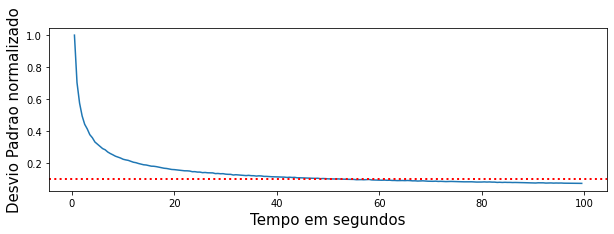

In [14]:
plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(np.arange(0.5,100,0.5),l)
plt.ylabel('Desvio Padrao normalizado', fontsize=15)
plt.xlabel('Tempo em segundos',  fontsize=15)
plt.axhline(0.1, color='r', linestyle='dotted', linewidth=2)
print('A partir de '+str(np.min(k))+ ' segundos de exposicao teremos desvio padrao <= 0.1')
plt.show()

A partir de 50.0 segundos de exposicao teremos desvio padrao <= 0.1


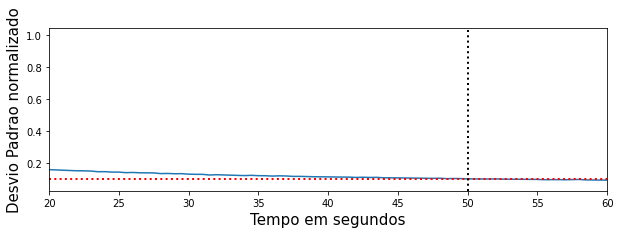

In [15]:
plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(np.arange(0.5,100,0.5),l)
plt.ylabel('Desvio Padrao normalizado', fontsize=15)
plt.xlabel('Tempo em segundos',  fontsize=15)
plt.axhline(0.1, color='r', linestyle='dotted', linewidth=2)
plt.axvline(np.min(k), color='k', linestyle='dotted', linewidth=2)
plt.xlim(20,60)
print('A partir de '+str(np.min(k))+ ' segundos de exposicao teremos desvio padrao <= 0.1')
plt.show()

2) Após a observação Bruno quer analisar os dados obtidos. Estes dados foram enviados para cada um de vocês (arquivo_1.dat). Analise e Responda:

    (a) Nossa primeira análise consiste em comparar o fluxo de duas estrelas que foram medidas simultaneamente em um mesmo conjunto de 100 imagens (coluna 1 e coluna 2 de arquivo_1.dat). Existe correlação entre estas duas estrelas? Qual a probabilidade desta correlação ser real? 
    
  > **Extra**: Consegue pensar em causas lógicas para que essa correlação exista?
    
    (b) Considerando que na noite anterior Bruno também observou essas duas estrelas em um conjunto de 87 imagens (arquivo_2.dat). Para cada estrela individualmente, qual a probabilidade destes dois conjuntos de dados serem equivalentes (tenham como origem a mesma distribuição)?
   
    ○ Comparar estrela A arquivo 1, com estrela A arquivo 2.
    ○ Comparar estrela B arquivo 1, com estrela B arquivo 2.

A correlação mede o grau em que dois fenômenos estão relacionados entre si. Duas variáveis tem correlação positiva se uma variação numa delas é associada a uma variação da outra no mesmo sentido, e uma correlação será negativa se o oposto ocorre. Vejamos o gráfico de dispersão entre ambas estrelas assim como suas informações quanto ao fluxo:

In [16]:
df_1 = pd.read_csv('arquivo_1.dat', header = 1, delim_whitespace=True) #Data Frame da primeira observação
df_1 = pd.DataFrame(data = df_1.values,columns = ['Estrela A', 'Estrela B'])
df_1

,Estrela A,Estrela B
0,122.079795,201.685896
1,163.475675,236.247474
2,164.771890,262.338923
3,102.591294,219.202813
4,142.315420,201.342672
...,...,...
95,185.702359,208.166159
96,152.542339,189.762820
97,112.954982,181.576566
98,152.421731,220.583227


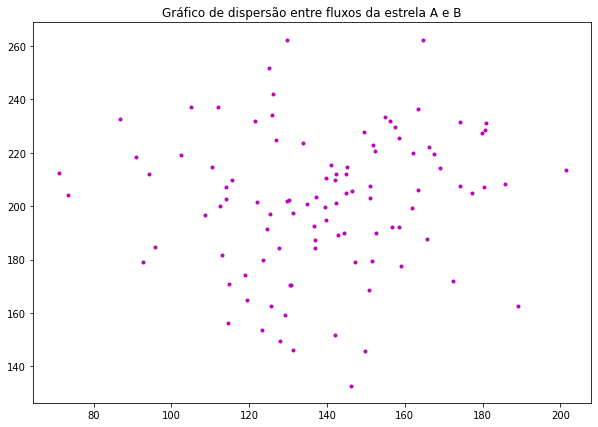

In [17]:
plt.figure(figsize = [10,7])
plt.title('Gráfico de dispersão entre fluxos da estrela A e B')
plt.plot(df_1['Estrela A'], df_1['Estrela B'],'m.') 
plt.show()

In [18]:
df_1.describe()

,Estrela A,Estrela B
count,100.000000,100.000000
mean,138.989146,201.541003
std,25.414835,26.192340
min,71.011480,132.826179
25%,124.417016,184.757203
50%,139.690902,203.802690
75%,156.359194,219.714019
max,201.424672,262.348418


<font color='red'> (BEM: Atenção a linguagem.)</font>
<font color='blue'> (My bad)</font>

Observamos que trabalhar com um padrão constituido de pontos dispersos numa tela é um tanto inconveniente. Em vez disso, podemos utilizar o poder da correlação como ferramenta estatística para encapsular uma associação entre duas variáveis numa única estatística descritiva: **O coeficiente de correlação**.


Este coeficiente se trata de um número único que varia de -1 a +1. Uma correlação de 1 será uma correlação perfeita, enquanto -1 será uma correlação perfeitamente inversa. Quanto mais proximo de 1 ou -1, mais forte a associação. Para esse caso usarei *Coeficiente de Kendall*, $τ$, que mede o como uma variável aumenta enquanto outra variável também aumenta, sem exigir que o aumento seja representado por uma relação linear.

> **OBS:** Uma característica atraente do coeficiente de correlação é que ele não está ligado a nenhuma unidade. Podemos calcular a correlação entre altura e peso - mesmo que a altura seja medida em centímetros e o peso em quilogramas.

In [19]:
#Coef Kendall
x = df_1['Estrela A']
y = df_1['Estrela B']

def pares(x,y):
    '''
    retorna o numero de concordantes e discordantes nessa ordem
    '''
    concord = 0.
    disc = 0.
    for i in tqdm(range(len(x))):
        for j in range(i,len(x)):
            if (x[i]-x[j])*(y[i]-y[j]) > 0:
                concord = concord+1
            elif (x[i]-x[j])*(y[i]-y[j]) < 0:
                disc = disc+1
    return concord,disc
                
N = len(x)                

tau = float(2*((pares(x,y)[0] - pares(x,y)[1])/(N*(N-1))))
tau

100%|██████████| 100/100 [00:01<00:00, 83.14it/s]


0.09898989898989899

Ou seja, temos uma correlação muito fraca (é considerado uma correlação forte a partir de $\tau = 0.7$).

 - Podemos chegar no mesmo resultado economizando algumas linhas de código:

In [20]:
x_1 = df_1['Estrela A']
y_1 = df_1['Estrela B']

In [21]:
tau_11, p_value_11 = stats.kendalltau(x_1,y_1)
print('tau = '+str(tau_11)) #Conferir resultado de tau.
print('A probabilidade de haver correlacao: '+str(1 - p_value_11)) #Probabilidade alta, mesmo c correlação baixa

tau = 0.098989898989899
A probabilidade de haver correlacao: 0.8555111790224474


A partir daqui se faz necessário explorar a inferência estatística e uma de suas ferramentas mais famosas, o **teste de hipóteses.**

 A estatística por sí só não prova nada; em vez disso, usamos inferência para aceitar ou rejeitar explicações com base na sua relativa probabilidade. Qualquer inferência estatística começa com uma hipótese nula implícita ou explícita. Essa é nossa premissa de partida, que será rejeitada ou não com base na nossa análise subsequente. 
 
 Se rejeitamos a *hipótese nula*, então geralmente aceitamos alguma hipótese alternativa que seja mais consistente com os dados observados. 
 
 > Por exemplo, no tribunal a hipótese nula H0 é a de que o réu é inocente.
 
Geralmente queremos provar a *Hipótese alternativa* **H1**, enquanto batemos na *Hipótese nula* **H0**. Note que a hipótese nula e a hipótese alternativa são completamente lógicas e, se uma é verdadeira, a outra não é. Se rejeitamos uma afirmação, devemos aceitar a outra.

> Nem sempre provamos a H0, podendo significar apenas que H1 está equivocada ou que as hipóteses não servem para o grupo de dados escolhidos. Em todo caso, é mais seguro afirmar apenas que, *com base nos dados coletados, meramente falhamos em rejeitar H0*.

Geralmente usamos o valor de 5% como limiar mais comum utilizado nas inferências estatísticas. Essa probabilidade é conhecida como *nível de significância* e representa o limite superior para a probabilidade de observação de algum padrão de dados se a hipótese nula fosse verdadeira. Ou seja, podemos rejeitar **H0** no nivel 0.05 se houver uma chance menor do que 5% de obter um resultado no mínimo tão extremo quanto o que observamos se a hipótese nula fosse verdadeira. 

Em outras palavras, se a chance de **H0** ser verdadeira, seguindo os dados coletados, for de 5% ou menos, rejeitaremos ela e aceitaremos **H1**.

- Quanto a comparação da estrela A e B da mesma observação:

**H0** : pertencem a mesma distribuição.
**H1** : são objetos totalmente distintos.

Queremos 5% seja a probabilidade dos nossos dados serem referentes ao **H0** caso ela seja verdadeira, importante definir isso previamente para que não haja viés.

Se não chegarmos nesse valor, não poderemos afirmar que **H0** é mentira (lembre do que discutimos antes). 
Ou seja, se os dados se referem a **H0** em apenas 5% ou menos das vezes, ja assumimos que **H1** estará correto. Se as hipóteses foram bem construídas (ou é uma, ou é outra), nossa decisão estará correta em 95% das vezes.


> O que chamaremos de *p_value* é a probabilidade específica de obter um resultado no mínimo tão extremo quanto o observado caso **H0** fosse verdadeira.

 - Sabendo disso, podemos fazer o mesmo teste que fizemos anteriormente com os dados da segunda observação, utilizando as hipóteses **H0** (há correlação) e **H1**(não há correlação):

In [22]:
df_2 = pd.read_csv('arquivo_2.dat', header = 1, delim_whitespace=True) #Data Frame da segunda observação
df_2 = pd.DataFrame(data = df_2.values,columns = ['Estrela A', 'Estrela B'])
df_2

,Estrela A,Estrela B
0,158.852587,158.041555
1,136.321944,177.979711
2,120.431295,207.329928
3,159.699529,223.032610
4,125.546134,222.161992
...,...,...
82,118.143370,202.691807
83,133.621132,230.530091
84,153.095538,216.275956
85,140.627839,247.126830


In [23]:
df_2.describe()

,Estrela A,Estrela B
count,87.000000,87.000000
mean,132.255606,194.484118
std,26.561849,24.340571
min,62.577636,143.982292
25%,117.814211,176.610733
50%,134.793448,196.219248
75%,151.544973,207.845813
max,182.074902,256.714477


In [24]:
x_2= df_2['Estrela A']
y_2=df_2['Estrela B']
tau_22, p_value_22 = stats.kendalltau(x_2,y_2)
print('tau = '+str(tau_22))
print('A probabilidade de nao haver correlacao (H0 rejeitada): '+str(1 - p_value_22))

tau = 0.07297514033680833
A probabilidade de nao haver correlacao (H0 rejeitada): 0.6830945818907175


Ou seja, percebemos baixa correlação entre as estrelas A e B de ambas as observações, provavelmente por se tratar de duas estrelas diferentes. A probabilidade de ter alguma correlação sendo:

In [25]:
print(p_value_11,p_value_22)

0.14448882097755258 0.3169054181092825


A maior correlação para o caso da segunda observação pode se dar pelo fato de haver sido captado algum fenômeno atmosférico que tenha afetado ambas estrelas (por exemplo, passagem de nuvens que as ofuscam de forma equivalente), ou algum ruído do instrumento. 

No geral, não é difícil supor que haja alguma correlação, mesmo que pequena, tendo em vista que são observações feitas na mesma hora, com o mesmo instrumento e no mesmo lugar.

 - **t-student** e **f-test**:

  A *distribuição t de Student* é uma distribuição de probabilidade absolutamente contínua e simétrica, que nos servirá para comparar a média dos dados coletados (que segue distribuição Normal) numa hipótese inicial (**H0**). Funciona mesmo em casos em que não se sabe qual é a média ou o desvio padrão da população, contanto que ela seja normal. 

   Um *teste F* é qualquer teste estatístico no qual a estatística de teste tem uma distribuição F (uma distribuição de probabilidade contínua) sob a hipótese nula, baseando-se na sua variancia. É mais frequentemente usado ao comparar modelos estatísticos que foram ajustados a um conjunto de dados, a fim de identificar o modelo que melhor se ajusta à população da qual os dados foram amostrados. Por exemplo, este teste é util para estudar a hipótese de que as médias de um determinado conjunto de populações normalmente distribuídas, todas com o mesmo desvio padrão, são iguais, por meio da análise de *variância*. 

In [26]:
def tstudent(x,y):
    '''
    recebe dois data frames e retorna o valor do t e o grau de liberdade
    '''
    ux = x.mean()
    uy = y.mean()
    n = len(x)
    m = len(y)
    v = n + m - 2 ##nesse caso estamos comparando apenas dois tipos de dados, entao nosso grau de liberdade terá - dois
    s = np.sqrt((n*(x.std()**2) + m*(y.std()**2))/v)
    return (ux - uy)/(s*np.sqrt(m**(-1) + n**(-1))),v

def f_test(x,y):
    '''
    recebe dois data frames e retorna o valor do f e os graus de liberdade de x e y (nessa ordem)
    '''
    ux = x.mean()
    uy = y.mean()
    n = len(x)
    m = len(y)
    return (x.std()**2)/(y.std()**2),n-1,m-1

In [27]:
#Comparando A1 e A2
tstudent(x_1,x_2)

(1.760070089405873, 185)

In [28]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=tstudent(x_1,x_2)[1])
stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1])

1.9728699462074988

 - Sabendo que os valores da tabela t-student são:
 
 
**(Unicaudal)** Pegando 5% apenas do *lado esquerdo*:

<code>stats.t.ppf(0.05,df=tstudent(x_1,x_2)[1])</code>

**(Unicaudal)** Pegando 5% apenas do *lado direito*:

<code>stats.t.ppf(1 - 0.05, df=tstudent(x_1,x_2)[1])</code>

**(Bicaudal)** Pegando 5% somando-se *ambos os extremos*:

<code>stats.t.ppf((1 - 0.05)/2,df=tstudent(x_1,x_2)[1])</code>

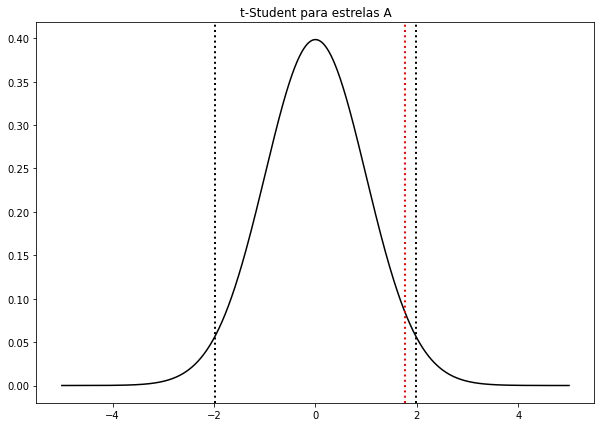

In [29]:
plt.figure(figsize = [10,7])
plt.title('t-Student para estrelas A')
plt.plot(t_dist,prob,'k')
plt.axvline(tstudent(x_1,x_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** não pode ser rejeitada seguindo nosso nivel de significancia. Isso significa que suas MÉDIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição. Em outras palavras, isso significa que o fluxo médio das estrelas A1 e A2 cai numa faixa que esperaríamos observar 95 vezes em cem num universo que **H0** seja verdadeira. 
 
 > Se caísse na faixa vista apenas 5 em cem vezes, consideraríamos **H1** correta e descartaríamos **H0**, nesse caso, em média, 95 das vezes em cem estaríamos rejeitando **H0** de forma correta.

 - A mesma análise com a observação da Estrela B:

In [30]:
#Comparando B1 e B2
tstudent(y_1,y_2)

(1.8887702755072446, 185)

In [31]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=tstudent(y_1,y_2)[1])

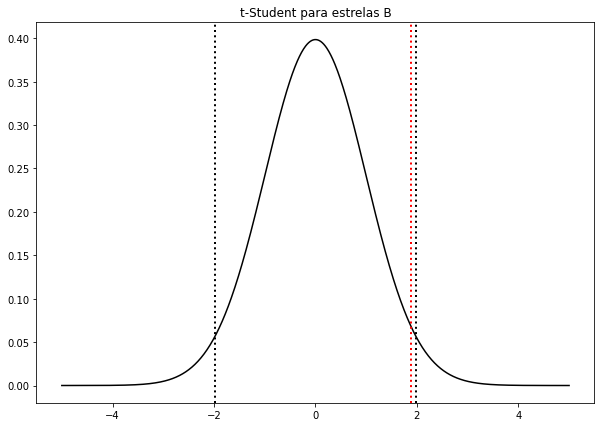

In [32]:
plt.figure(figsize = [10,7])
plt.title('t-Student para estrelas B')
plt.plot(t_dist,prob,'k')
plt.axvline(tstudent(y_1,y_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=tstudent(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=tstudent(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** novamente não pode ser rejeitada. Isso pois suas MÉDIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição.

Agora iremos fazer o teste F para levarmos em consideração a variancia dos nossos dados.

In [33]:
f_test(x_1,x_2)

(0.915499287644621, 99, 86)

In [34]:
f_dist = np.linspace(-5,+5,1000)
prob = stats.f.pdf(x= t_dist, dfn=f_test(x_1,x_2)[1],dfd=f_test(x_1,x_2)[2])

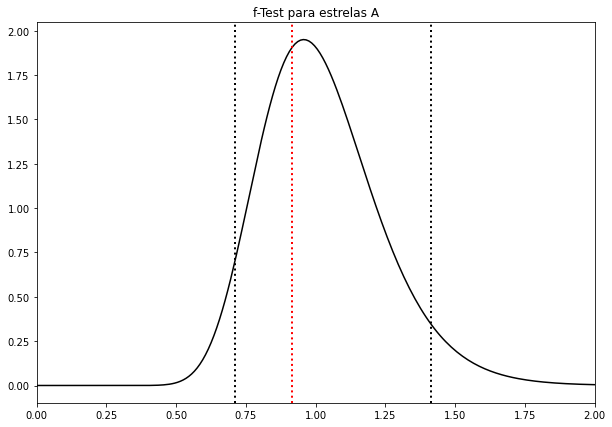

In [35]:
plt.figure(figsize = [10,7])
plt.title('f-Test para estrelas A')
plt.plot(f_dist,prob,'k')
plt.axvline(f_test(x_1,x_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.f.ppf(0.05,dfn=f_test(x_1,x_2)[1],dfd=f_test(x_1,x_2)[2]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(stats.f.ppf(1-0.05,dfn=f_test(x_1,x_2)[1],dfd=f_test(x_1,x_2)[2]), color='k', linestyle='dotted', linewidth=2) 
plt.xlim(0,2)
plt.show()

 - **H0** novamente não pode ser rejeitada. Isso pois suas VARIÂNCIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição.

In [36]:
f_test(y_1,y_2)

(1.1579427820586021, 99, 86)

In [37]:
f_dist = np.linspace(-5,+5,1000)
prob = stats.f.pdf(x= t_dist, dfn=f_test(y_1,x_2)[1],dfd=f_test(y_1,y_2)[2])

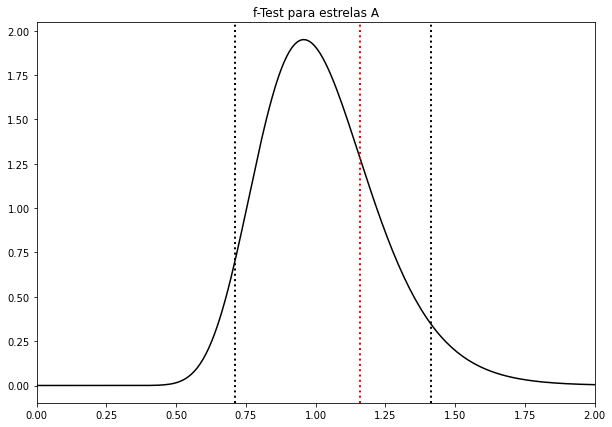

In [38]:
plt.figure(figsize = [10,7])
plt.title('f-Test para estrelas A')
plt.plot(f_dist,prob,'k')
plt.axvline(f_test(y_1,y_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.f.ppf(0.05,dfn=f_test(y_1,y_2)[1],dfd=f_test(y_1,y_2)[2]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(stats.f.ppf(1-0.05,dfn=f_test(y_1,y_2)[1],dfd=f_test(y_1,y_2)[2]), color='k', linestyle='dotted', linewidth=2) 
plt.xlim(0,2)
plt.show()

 - **H0** novamente não pode ser rejeitada. Isso pois suas VARIÂNCIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição.

 - E afinal, qual a probabilidade destes dois conjuntos de dados serem equivalentes (tenham como origem a mesma distribuição)? 

Sabemos que os dados coletados estão dentro do universo **H0**. Ou seja, partindo que **H0** é verdadeiro (as estrelas observadas fazem parte da mesma distribuição), nossos dados concordam com a maioria das outras amostras que viriam da mesma distribuicao. Portanto, podemos afirmar com **95% de certeza** que os dados coletados *vem da mesma distribuição*.
> *Perceba que nesse caso as hipóteses foram escolhidas tal que 'ou elas pertencem ou não pertencem', e, seguindo as amostras coletadas, há 95% de chance dos dados terem vindo de duas estrelas da mesma dsitribuição*.